In [1]:
# first we need to import some modules
# utility to read json format
import json as js
# urllib2 is a module for fetching URL (Uniform Resource Locator) data
import urllib2 as ulib
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# form a request
request_string='https://api.fda.gov/drug/event.json?search=patient.drug.medicinalproduct:aspirin&count=patient.reaction.reactionmeddrapt.exact'

import ssl

# to get around https error as described here 
# http://stackoverflow.com/questions/27835619/ssl-certificate-verify-failed-error
# This restores the same behavior as before.
context = ssl._create_unverified_context()
response=ulib.urlopen(request_string,context=context)

print response

# load as json
fda_data=js.load(response)

fda_data

<addinfourl at 140501046456616 whose fp = <socket._fileobject object at 0x7fc8f301c1d0>>


{u'meta': {u'disclaimer': u'openFDA is a beta research project and not for clinical use. While we make every effort to ensure that data is accurate, you should assume all results are unvalidated.',
  u'last_updated': u'2016-03-25',
  u'license': u'http://open.fda.gov/license'},
 u'results': [{u'count': 12349, u'term': u'DYSPNOEA'},
  {u'count': 12061, u'term': u'NAUSEA'},
  {u'count': 10734, u'term': u'DIZZINESS'},
  {u'count': 10652, u'term': u'FATIGUE'},
  {u'count': 10491, u'term': u'FLUSHING'},
  {u'count': 9311, u'term': u'DIARRHOEA'},
  {u'count': 9058, u'term': u'DRUG INEFFECTIVE'},
  {u'count': 8473, u'term': u'MYOCARDIAL INFARCTION'},
  {u'count': 8412, u'term': u'ASTHENIA'},
  {u'count': 8189, u'term': u'HEADACHE'},
  {u'count': 7313, u'term': u'FALL'},
  {u'count': 7279, u'term': u'PAIN'},
  {u'count': 7194, u'term': u'VOMITING'},
  {u'count': 7071, u'term': u'PRURITUS'},
  {u'count': 6896, u'term': u'CHEST PAIN'},
  {u'count': 6069, u'term': u'ANAEMIA'},
  {u'count': 5987, 

In [5]:
type(fda_data)

dict

In [6]:
for key, value in fda_data.iteritems() :
    print key

meta
results


In [7]:
results=fda_data['results']

In [8]:
type(results)

list

In [9]:
test=pd.DataFrame(results)

In [10]:
test.head()

,count,term
0,12349,DYSPNOEA
1,12061,NAUSEA
2,10734,DIZZINESS
3,10652,FATIGUE
4,10491,FLUSHING


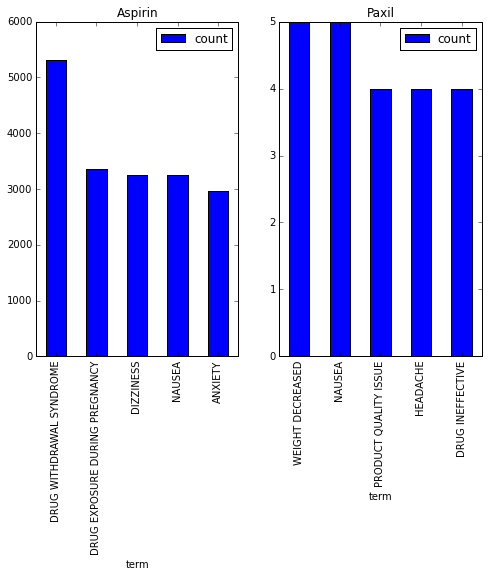

In [13]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
drug1='paxil'
drugname2='paxil'

# form a request
def getDrugData(drugname):
    request_string='https://api.fda.gov/drug/event.json?search=patient.drug.medicinalproduct:'+drugname+'&count=patient.reaction.reactionmeddrapt.exact'
    response=ulib.urlopen(request_string, context=context)
    
    # load as json
    fda_data=js.load(response)['results']
    
    # make it a dataframe
    fda_data=pd.DataFrame(fda_data)

    # make drug term the index and return
    return fda_data.set_index('term')

data1=getDrugData('paxil')
data2=getDrugData('aspirn')

fig=plt.figure(figsize=(8, 6))

ax1=plt.subplot(121)
ax2=plt.subplot(122)

data1.iloc[0:5].plot.bar(ax=ax1)
data2.iloc[0:5].plot.bar(ax=ax2)

ax1.set_title("Aspirin")
ax2.set_title("Paxil")